# Assignment 1 - Part 2

<div class="alert alert-block alert-warning">
    Below we import <a href="https://github.com/HIPS/autograd">autograd</a>. If you get an error saying you don't have it, you will need to install it with pip, using
<pre>
pip install autograd
</pre>
</div>

In [131]:
# I'm using PTable for making tables, so be sure to run this cell to check if you have PTable

import os

def import_or_install(name):
    try:
        __import__(name)
    except ImportError:
        os.system('pip install ' + name)

import_or_install("PTable")

from prettytable import PrettyTable

In [132]:
import  autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian, grad

## Newton's Method

We want to approximate solutions of nonlinear equation in __two variables__ using Newton's method.

Newton's method is implemented below.

Implement a stopping criterion. That is, given some tolerance $TOL$, end the method when $\mathbf{x}^k:=(x_1^k,x_2^k)$ satisfies $\|F(\mathbf{x}^k)\|_2\le TOL$ or $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2\le TOL$.

Provide numerical evidence that your code works as it should by printing the values of $\|F(\mathbf{x}^k)\|_2$ for each iteration, and by making a plot of $\|F(\mathbf{x}^k)\|_2$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2$, for all $k$.

Now, verify numerically the convergence is quadratic. You will need a reference solution, and one can do this in two ways:

 - Consider a problem for which you know an exact solution, and use said solution as a reference solution,
 - or for your problem, should you not know a solution, use the method to obtain an extremely accurate result which you use as a reference solution

In [133]:
def ooc(S):
    """
    Calculation of the order of a convergence of a convergent series.

    --Parameters--
    S: A list of NumPy-arrays
        The input list needs to have at least four elements for the method to succeed.
    
    --Returns--
    A float as the order of convergence of the series, or 0 if the function fails.
    """
    if (np.log(S[-2]/S[-3]) == 0) or (S[-2] == 0) or (S[-3] == 0):
        return 0
    if len(S) >= 3:
        return np.log(S[-1]/S[-2])/np.log(S[-2]/S[-3])
    return 0

In [134]:
def roc(S, q):
    """
    Finding a bound of the convergent error series

    --Parameters--
    S: A sequence

    --Side-effect--
    Shows a plot of this thing
    """
    ls = [S[i+1]/(S[i]**q) for i in range(len(S)-1)]
    print("Evolution of rate of convergence:")
    plt.figure()
    plt.axes(xlabel = "Iteration", ylabel = "Rate of Convergence")
    plt.plot(ls)
    plt.show()
    print("\n")

    return max(ls)

In [135]:
def newtonsMethod(F, x0, maxIter=100, TOL=1.0e-1000):
    """
    Implementation of Newton's root finding method.
    
    --Parameters--
    F: Function
        Numpy array of shape (2,) as input and output.
        This is the function we wish to find the root for
    x0: Numpy array of shape (2,).
        This is the initial guess for the method.
    maxIter: Integer
        The maximum number of iterations to do.
    TOL: Float
        The level of tolerance for when to stop the search
    """
    DF = jacobian(F) # Calculate the jacobian matrix of our function
    
    # Initialize variables before the for-loop 
    x1 = x0
    A, I, D, S = [], [], [], []
    
    for k in range(0, maxIter):
        x0 = x1
        J = DF(x0)
        Fx = F(x0)
        x1 = x0 - np.linalg.solve(J,Fx)
        A.append(x1) # Adding each iteration to A
        I.append(np.linalg.norm(Fx,2)) # Adding the norm of Fx to I
        D.append(np.linalg.norm(x1-x0,2)) # Adding the difference to D
        if ((D[-1]<=TOL) or (I[-1]<=TOL)) and (k > 3): break

    # Creating the error series
    for i in range(len(A)-1):
        S.append(np.linalg.norm(A[i]-A[-1])) # Adding the error to S

    print("Evolution of ||F(x)||:")
    plt.figure()
    plt.axes(xlabel = "Iteration", ylabel = "||F(x)||")
    plt.semilogy(I)
    plt.show()
    print("\n")

    print("Evolution of ||x1-x0||:")
    plt.figure()
    plt.axes(xlabel = "Iteration", ylabel = "||x1-x0||")
    plt.semilogy(D)
    plt.show()
    print("\n")

    print("Evolution of error:")
    plt.figure()
    plt.axes(xlabel = "Iteration", ylabel = "Error")
    plt.plot(S)
    plt.show()
    print("\n")

    print(f"Rate of convergence:\nM >= {roc(S, 2)}\n")
    
    print(f"Order of convergence:\n{ooc(S)}\n")

    return x1

Evolution of ||F(x)||:


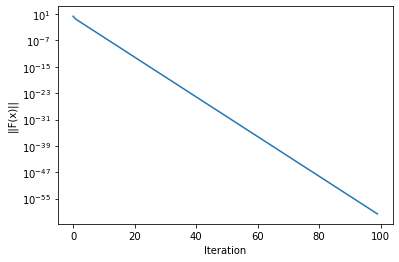



Evolution of ||x1-x0||:


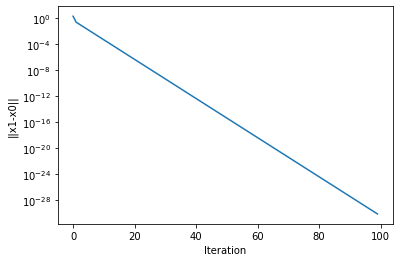



Evolution of error:


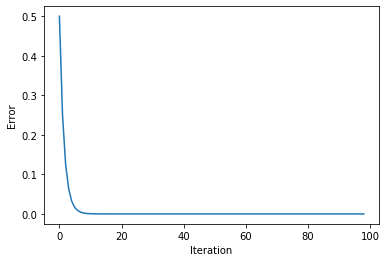



Evolution of rate of convergence:


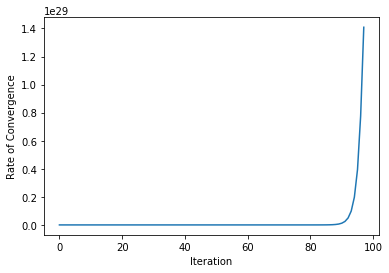



Rate of convergence:
M >= 1.4085006669202548e+29

Order of convergence:
1.2966069431192224

Zero:
[7.88860905e-31 0.00000000e+00]


In [136]:
# Test suite 1
f = lambda v: np.array([v[0]**2,v[1]])
print(f"Zero:\n{newtonsMethod(f, np.array([1.,2.]))}")

# I was unable to find an upper bound for the rate of convergence, but if I set the order to equal to the calculated order, I will get an upper bound for this function.
# This doesn't proboably work, as my answer isn't correct enough to get a good enough error estimate.
# Either way we can observe that the convergence is superlinear

Evolution of ||F(x)||:


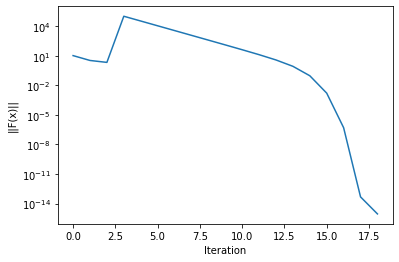



Evolution of ||x1-x0||:


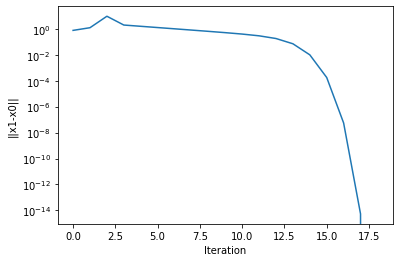



Evolution of error:


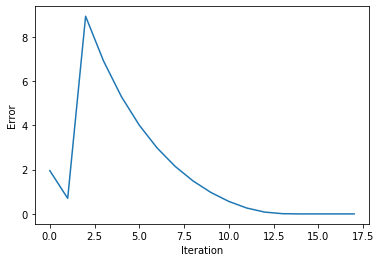



Evolution of rate of convergence:


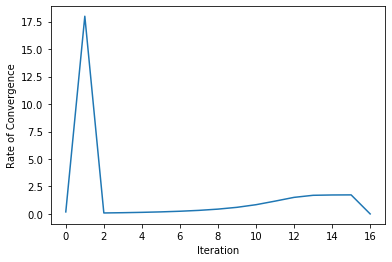



Rate of convergence:
M >= 17.98971967498433

Order of convergence:
inf

Zero:
[-1.15996226  1.        ]
c:\python38\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


In [137]:
# Test suite 2
g = lambda v: np.array([v[1]**3+v[0]**5+1.1,v[1]**2-1])
print(f"Zero:\n{newtonsMethod(g,np.array([1.,2.]))}")
# Here we can see that the calculated bound is bounded, therefore we have quadratic convergence. The calculation of the order failed though...

## Linear systems

Consider the linear system 
	\begin{equation*}
	A \mathbf{u} = \mathbf{f},
	\end{equation*}
where $A$ is a finite-difference discretization of the 2D Laplacian, this is a block tridiagonal matrix, implemented in the code below, and $\mathbf{f}$ is the vector with all components equal to one.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy import linalg
import time

# Creating the 2D laplacian matrix
def create2DLaplacian(nx, ny):
    N  = nx*ny
    main_diag = np.ones(N)*-4.0
    side_diag = np.ones(N-1)
    side_diag[np.arange(1,N)%4==0] = 0
    up_down_diag = np.ones(N-3)
    diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
    laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx])
    return laplacian*np.eye(N)

# Dummy matrix
test = create2DLaplacian(3,3)
print(test)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  1. -4.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  1.  0.  1.]
 [ 0.  0.  0.  1.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -4.]]


We will now approximate the solution of this linear system using some different iteration methods of the type 
	\begin{equation*}
		A_1 \mathbf{u}^{(k+1)} = A_2 \mathbf{u}^{(k)}+\mathbf{f},
	\end{equation*}
	where $A = A_1 - A_2$ with $|A_1|\ne0$. The way we choose the matrices $A_1$ and $A_2$ depends upon the method. We will use the following iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($A_1 = A_d$).

b) Forward Gauss-Seidel ($A_1 = A_d-A_l$).

c) Successive over relaxation ($A_1 = A_d-\omega A_l$, where you can choose the value of $\omega\in (0,1)$).

Here $A = A_d - A_l - A_u$, where

- $A_d$ is the diagonal of $A$,
- $A_l$ is $-$(strictly lower triangular part of $A$),
- $A_u$ is $-$(strictly upper triangular part of $A$).

Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We fix $nx=ny=10$ and $N=100$. For each of the above, you should:

i) Compare the convergence of each method. Submit  a semi-log plot of the $2$-norm of the relative residual $\frac{ \|\mathbf{r}^k\|_2 }{ \| \mathbf{r}^0\|_2 }$ versus the number of iterations. Plot all the methods in the same plot for comparison.
Experiment choosing different values of $\omega$ in the SOR method, try to find a value that gives you optimal convergence for this problem.


ii) Implement a stopping criterion for the three methods as you have done for the Newton method. Record the relative time each method takes per iteration, and the rime needed to obtain a norm of the relative residual below toleances  $TOL=1e-7$ and $TOL=1e-14$. Make a table with the results for each method.

iii) Calculate the spectral radius of $A_1^{-1}A_2$ and see how that relates to convergence of the method. Make a semi-log plot for comparison. 

<div class="alert alert-block alert-info">
<b>Hint:</b> Python's 
    <pre>numpy.linalg.eigvals(A)</pre>
function returns the eigenvalues of $A$.
</div>

Note from student:
I realized after creating all of the different methods, that they are all special cases of the last method...

In [139]:
# The way I have solved these tasks is that I have implemented the functions to solve them beforehand, and then used the apropriate functions to solve the given task.
# This is the matrix to use for the final tests
toRun = create2DLaplacian(10,10)
print(toRun)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


In [140]:
# I hope the names of these functions are self-explanatory

def extractDiagonal(A):
    return np.diag(np.diag(A))

def extractLower(A):
    return -1*sparse.tril(A,-1)*np.identity(A.shape[0])

def extractUpper(A):
    return -1*sparse.triu(A,1)*np.identity(A.shape[0])

def getSpectralRadius(A):
    return np.linalg.norm(np.linalg.eigvals(A), np.inf)

In [141]:
def generalIteration(A, B, C, f, u0, maxIter, TOL):
    """
    The method of iteration used for the following problems

    --Parameters--
    A: NumPy Matrix
        This is the matrix denoted A
    B: NumPy Matrix
        This is the matrix denoted A1 inverse
    C: NumPy Matrix
        This is the matrix denoted A2
    f: NumPy Array
        f as the f from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        The maximal iteration depth
    TOL: Float
        The level of tolerance between our approximation and the real solution

    --Returns--
    Returns a tuple of three things:
        1. The sequence created by the iteration
        2. The sequence of residues
        3. A list of time spent per iteration
    """
    # Setting up variables before loop
    u1 = u0
    Iter = [u0]
    TimeIter = []

    totNow = time.time() # Start "total" stopwatch 
    for i in range(maxIter):
        now = time.time() # Start "relative" stopwatch
        u0 = u1
        u1 = B @ (C @ u0 + f) # Calculate next element of sequence
        Iter.append(u1)
        if (np.linalg.norm(A@u1-f) <= TOL) or (np.linalg.norm(u1-u0) <= TOL) : 
            then = time.time() # End "relative" stopwatch
            TimeIter.append(then-now) # Add time taken to list
            break
        then = time.time() # End "relative" stopwatch
        TimeIter.append(then-now) # Add time taken to list
    totThen = time.time() # End "global" stopwatch

    return Iter, list(map(lambda x: f - A@x, Iter)), TimeIter, totThen - totNow

In [142]:
def jacobiMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of Jacobis Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        Has no purpose in this function, only to make another function function

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initializing problem
    inv = lambda x: 1/x 
    A1Inv = np.diag(inv(np.diag(A))) # Since I know that A1 is diagonal, the inverse is quite easy to calculate
    A2 = extractDiagonal(A) - A

    specRad = getSpectralRadius(A1Inv@A2)
    out, res, relTimeIt, totTimeIt = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return out, res, relTimeIt, totTimeIt, specRad

In [143]:
def ForwardGSMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of Forward Gauss-Seidel Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        Has no purpose in this function, only to make another function function

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initialize problem
    A1Inv = np.linalg.inv(extractDiagonal(A) - extractLower(A))
    A2 = extractUpper(A)

    specRad = getSpectralRadius(A1Inv @ A2)
    out, res, relTimeIt, totTimeIt = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return out, res, relTimeIt, totTimeIt, specRad

In [144]:
def SuccessOverRelaxMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of the Success over relaxation Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        The first element of args is assigned to be w. If no element has been provided, fall back to 0.5

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initialize problem
    if len(list(args)) == 0:
        w = 0.5
    else:
        w = args[0]
    A1Inv = np.linalg.inv(extractDiagonal(A) - w*extractLower(A))
    A2 = (1-w)*extractLower(A) + extractUpper(A)

    specRad = getSpectralRadius(A1Inv @ A2)
    out, res, relTimeIt, totTimeIt = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return out, res, relTimeIt, totTimeIt, specRad

In [145]:
def randomVec(n, reach):
    """
    Creating a random vector

    --Parameters--
    n: Integer
        Dimension of the vector
    reach: Float
        the values of each element in the vector is within the interval (-reach,reach)

    --Returns--
    Returns a vector of dimension n with random entries.
    """
    np.random.seed()
    v = np.random.rand(n)
    trans = lambda x: 2*reach*(x-1/2)
    return trans(v)

In [158]:
def testIteration(Iterative, initVal = False, A = test, f = randomVec(9, 10), u0 = randomVec(9, 10), maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of a random test generator

    --Parameters--
    Iterative: Function
        This is which iteration method as defined above should be used
    A: NumPy Matrix
        The matrix given as A
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack

    --Returns--
    Returns a tuple of four things:
        1. The order of convergence
        2. The average iteration time
        3. the average norm-calculation time
        4. The level of tolerance
    """
    out, res, relTimeIt, totTimeIt, specRad = Iterative(A, f, u0, maxIter, TOL, *args)

    if initVal:
        print(f"u0:\n{u0}")
        print(f"f:\n{f}")
        print(f"Solution:\n{out[-1]}")

    relRes = []
    diffTime = []

    totNow = time.time() # Start "total" stopwatch
    
    for x in res:
        now = time.time()
        relRes.append(np.linalg.norm(x)/np.linalg.norm(res[0]))
        then = time.time()
        diffTime.append(then-now)

    totThen = time.time() # Stop "total" stopwatch
    totDiffTime = totThen - totNow 

    diffRes = [relRes[i+1]/relRes[i] for i in range(1, len(relRes)-1)]

    avgItTime = sum(relTimeIt)/len(relTimeIt)
    avgDiffTime = sum(diffTime)/len(diffTime)

    morphIt = lambda x: x - avgItTime
    morphDiff = lambda x: x - avgDiffTime

    devItTime = sum(map(lambda x: np.sqrt(x), map(lambda x: x**2, map(morphIt, relTimeIt))))/(len(relTimeIt)-1)
    devDiffTime = sum(map(lambda x: np.sqrt(x), map(lambda x: x**2, map(morphDiff, diffTime))))/(len(diffTime)-1)

    return diffRes[-1], specRad, avgItTime, devItTime, devDiffTime, avgDiffTime, TOL, relRes

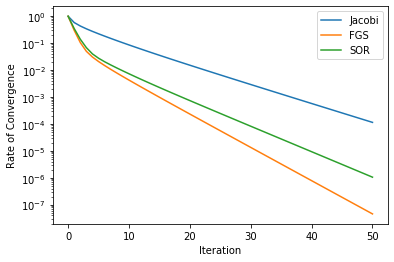

In [159]:
# This is part one of the solution to taks i)
def rankResidues(A, w=0.7, printable = False):
    """
    A function which makes a plot of the relative residues from the different methods
    It generates a random f and creates a random guess, to randomize the test

    --Parameter--
    A - NumPy Matrix
        The matrix to use a base for the iteration problem

    --Side-effect--
    Prints a plot of the residues

    --Returns--
    A tuple of the residues
    """

    f, u = randomVec(100, 10), randomVec(100, 10)
    methods = [jacobiMeth, ForwardGSMeth, SuccessOverRelaxMeth]
    names = ["Jacobi", "FGS", "SOR"]

    pilates = [testIteration(meth, False, A, f, u, 50, 1e-10, w)[-1] for meth in methods]

    for i in range(len(names)):
        pilates[i] = (names[i], pilates[i])

    if printable:
        plt.figure()
        plt.axes(xlabel = "Iteration", ylabel = "Rate of Convergence")
        for el in pilates:
            plt.semilogy(el[1], label = el[0])
        plt.legend()


    return pilates

hack = rankResidues(toRun, printable = True) # Need to bind the output, so that jupyter won't print it

# Here we can see that Forward Gauss-Seidel is the best, but as we will see, that is only when w < 1. 

Smallest at: 1.3586413586413586


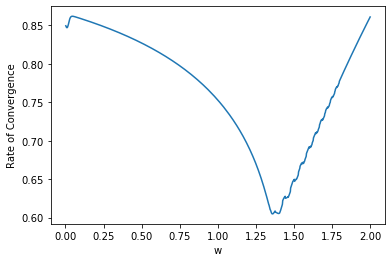

In [160]:
# This is part two of the solution of i)
def optimalSOR(fineness, A, f, u, printable = False):
    """
    A test for finding different convergence rates for the SOR-method

    --Parameters--
    fineness - Integer
        How many steps the graph should take
    A - NumPy Matrix
        iteration problem matrix
    f - NumPy Array
        iteration problem vector
    u - NumPy Array
        initial guess
    printable - Bool
        If it should print the graph or not print the graph

    --Side-effect--
    Prints a plot of the graph

    --Returns--
    Returns all the statistics from the SOR-tests
    """
    somethingsomething = [2*i/(fineness+1) for i in range(1, (fineness+1))]
    tests = [testIteration(SuccessOverRelaxMeth, False, A, f, u, 100, 1e-10, 2*i/(fineness+1)) for i in range(1,(fineness+1))]
    if printable:
        plt.figure()
        plt.axes(xlabel = "w", ylabel = "Rate of Convergence")
        plt.plot(somethingsomething, [el[0] for el in tests])

    return somethingsomething, tests


f, u = randomVec(100, 10), randomVec(100, 10)

smol = (0, 1)

somethingsomething, tests = optimalSOR(1000, toRun, f, u, True)
pairing = [(somethingsomething[i], tests[i][0]) for i in range(len(tests))]
for tup in pairing:
    if tup[1] < smol[1]: smol = tup

print(f"Smallest at: {smol[0]}")

# Be looking further than the scope of (0,1) we observe that the lowest point is at...
# NB: this number fluctuates a bit, and may give answers from 1.33 to 1.38

In [161]:
# Solution of ii)
def rankMethods(A, w=0.5, printable = False):
    """
    A function which makes a table of statistics from the different methods
    It generates a random f and creates a random guess, to randomize the test

    --Parameter--
    A - NumPy Matrix
        The matrix to use a base for the iteration problem

    --Side-effect--
    Prints a table of the statistics

    --Returns--
    The list of the statistics
    """

    f, u = randomVec(100, 10), randomVec(100, 10)
    methods = [jacobiMeth, ForwardGSMeth, SuccessOverRelaxMeth]
    names = ["Jacobi", "FGS", "SOR"]
    tolerances = [1e-7, 1e-14]
    others = [list(testIteration(meth, False, A, f, u, 1000, tol, w)[:-1]) for tol in tolerances for meth in methods]

    for i in range(len(others)):
        others[i].insert(0, names[i%3])

    if printable:
        x = PrettyTable()

        x.field_names = ["Method Name", "Rate of Convergence", "Spectal Radius", "Average Iteration time", "STD Iteration Time", "Average Norm Time", "STD Norm Time", "Tolerance"]

        for el in others:
            x.add_row(el)

        print(x)

    return others

hack = rankMethods(toRun, printable = True) # Need to bind the output, so that jupyter won't print it

# I was unsure how to represent the time per iteration. Due to computer running subrutines all the time, the best answer would be to calculate the expected average and the expected standard deviation. STD is short for standard deviation.

+-------------+---------------------+--------------------+------------------------+------------------------+------------------------+------------------------+-----------+
| Method Name | Rate of Convergence |   Spectal Radius   | Average Iteration time |   STD Iteration Time   |   Average Norm Time    |     STD Norm Time      | Tolerance |
+-------------+---------------------+--------------------+------------------------+------------------------+------------------------+------------------------+-----------+
|    Jacobi   |  0.8634916130083431 | 0.8650653134026233 | 0.0002637480901292533  | 0.00039562213519387957 | 4.824860731351502e-05  | 2.452975413838371e-05  |   1e-07   |
|     FGS     |  0.7526374014899654 | 0.7526561945006798 | 0.0002297364748441256  | 0.00035896324194394644 | 3.0221361102479896e-05 | 1.5110680551239938e-05 |   1e-07   |
|     SOR     |  0.8270571124542101 | 0.8270596956759886 | 0.0002390273073886303  | 0.00036471518955304903 | 2.0975815622430124e-05 | 1.048790781

In [162]:
def compareConvSpec(A, method, f = randomVec(100, 10), u = randomVec(100, 10), w=0.5, printable = False):
    """
    A function which compares the Rate of Convergence to the Spectral Radius
    The SOR method has w = 0.5 for all tests

    --Parameters--
    A - NumPy Matrix
        Defining matrix for the iteration method

    method - Function
        The iteration method to use

    --Side-Effects--
    Prints the rate of convergence alongside its spectral radius

    --Returns--
    Returns the statistics for the test
    """
    subject = testIteration(method, False, A, f, u, 1000, 1e-10, w)

    if printable: print(f"Rate of convergence: {subject[0]}\nSpectralradius: {subject[1]}")

    return subject

Jacobi
-------------------------------------------------
Rate of Convergence: 0.8499107341074877
Spectral Radius: 0.8650653134026233

FGS
-------------------------------------------------
Rate of Convergence: 0.7527521293243807
Spectral Radius: 0.7526561945006798

SOR - w = 1.3586413586413586
-------------------------------------------------
Rate of Convergence: 0.5936423945940675
Spectral Radius: 0.6001318295518312



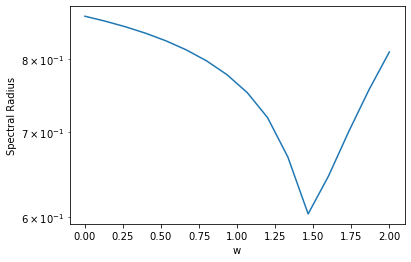

In [164]:
def rankSpec(fineness, A, w, printable = False):
    f, u = randomVec(100, 10), randomVec(100, 10)

    methods = [jacobiMeth, ForwardGSMeth, SuccessOverRelaxMeth]
    names = ["Jacobi", "FGS", f"SOR - w = {w}"]
    tests = [compareConvSpec(toRun, methods[i], f, u, w) for i in range(len(methods))]

    _, sors = optimalSOR(15, toRun, f, u)
    plotlist = [tests[0][1]]

    for el in sors:
        plotlist.append(el[1])

    if printable:    
        for i in range(len(methods)):
            print(f"{names[i]}")
            print("-------------------------------------------------")
            print(f"Rate of Convergence: {tests[i][0]}\nSpectral Radius: {tests[i][1]}\n")
    
        scalelist = list(np.arange(0,2,2/(len(plotlist)-1)))
        scalelist.append(2.)

        plt.figure()
        plt.axes(xlabel = "w", ylabel = "Spectral Radius")
        plt.semilogy(scalelist, plotlist)

rankSpec(15, toRun, smol[0], True)

